# ORIE 4580/5580/5581 Assignment 5

#### Student: A. Elison (ahe45)

### Github link: https://github.com/Abbie000/ORIE-4580-HWs/blob/main/ORIE_4580_HW_5.ipynb


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with an automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

<hr>

## Ans.

**Given**

Total population of hawks in the area: $N$ (unknown, what we want to estimate)

Number of tagged hawks: $n = 10$

Observation period: 5 weeks.

Average number of total bird visits per week: $\bar{X}_{total} = 28.8$

Average number of tagged bird visits per week: $\bar{X}_{tagged} = 6$

Each hawk (tagged or untagged) visits the feeder according to a Poisson process with rate $λ$ per week.


**Step 1. Expected number of visits per week**

Since each individual bird’s visits follow a Poisson process with rate
λ:

Each tagged bird contributes on average $λ$ visits per week.

Each untagged bird also contributes $λ$ visits per week.

So in one week:

$E[tagged \, visits] = nλ$

$E[total \, visits] = Nλ$


**Step 2. Relate the observed averages to expectations**

Since the two observed sample means are roughly equal to their expectations under the method of moments:

$$nλ = 6, Nλ = 28.8$$


**Step 3. Solve for λ and N**

$nλ = 6 \implies λ = \frac{6}{n} = \frac{6}{10} = 0.6$

$\implies Nλ = 28.8 = N(0.6) \implies N = \frac{28.8}{0.6} = 48$

So an estimate for the total population of red-tailed hawks is:
$$N = 48$$

<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.

Number of tagged hawks (from part a): $n=10$

Total observed unique birds: $k = 20$

Tagged observed birds: $x=4$

Untagged observed birds: $16$

______

**Analytic Solution:**

We use a Hypergeometric distribution, since we're observing a sample of $k = 20$ hawks from the total population $N$, and in that sample, $x = 4$ are tagged (out of $n = 10$ total tagged in the population):

$P(X=x|N,n,k) = \frac{\binom{n}{x} \, \binom{N - n}{k - x}}{\binom{N}{k}}$

To find $N$ that maximizes $P(X = 4|N)$, we maximize:

$L(N) = \frac{\binom{10}{4} \, \binom{N - 10}{16}}{\binom{N}{20}}$

Now, if tags are distributed randomly throughout the population, then the proportion of tagged animals in your second sample should be roughly equal to the proportion of tagged animals in the entire population. So we can use the Lincoln–Petersen estimator:

$$\frac{x}{k} ≈ \frac{n}{N} \implies \hat{N} = \frac{nk}{x}$$

So

$$\hat{N}_{MLE} = \frac{nk}{x} = \frac{10 ⋅ 20}{4} = 50$$

Thus, for the size of the hawk population in Itahca,

$$\hat{N}_{MLE} \, (approximate) = 50 \, hawks$$

In [1]:
# find MLE using code
import numpy as np
from math import comb

# Given values
n = 10   # tagged hawks
k = 20   # total hawks observed
x = 4    # tagged observed

# Define the hypergeometric likelihood function
def hypergeo_likelihood(N, n, k, x):
    if N < max(n, k):
        return 0  # impossible case
    return comb(n, x) * comb(N - n, k - x) / comb(N, k)

# Search over a reasonable range of N values
N_values = np.arange(max(n, k), 200)  # test N from 20 up to 200
likelihoods = [hypergeo_likelihood(N, n, k, x) for N in N_values]

# Find the N that maximizes the likelihood
N_hat = N_values[np.argmax(likelihoods)]

print(f"Exact MLE for total population size: N̂ = {N_hat}")

MLE for total population size: N̂ = 49


<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between $0$ and $40$. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>

## Ans.

As given,

the daily demand of soup is modeled as:

$$N_i \sim Geometric(p) \quad , \quad i = 1, 2, ..., 100$$

with pmf:

$$P(N_i = k) = (1-p)^kp \quad , \quad k = 0,1,2,...$$

where $p$ is the probability that the “demand process” stops (i.e., the chance someone doesn't want soup after $k$ customers).

<hr>

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


For uncensored days $(N_i = k_i < 40)$:

$P(N_i = k_i) = (1 - p)^{k_i}p$

For censored days $(N_i ≥ 40)$:

$P(N_i ≥ 40) = ∑_{k = 40}^∞ (1 - p)^kp = (1 - p)^{40}$

So the total likelihood is:
$L(p) = ∏_{i: N_i < 40} [(1-p)^{k_i}p] ⋅ ∏_{i: N_i = 40}(1-p)^{40}$

To simplify, let $$S = ∑_{i: N_i < 40} k_i$$ be the total number of soups sold on uncensored days.

Then

$$L(p) = p^{n-r}(1-p)^{S+40r}$$

So

$$ℓ(p)=(n-r)lnp+(S+40r)ln(1-p)$$

Differentiate and set to 0:

$$\frac{dℓ(p)}{dp} = \frac{n-r}{p} - \frac{S+40r}{1-p} = 0$$

$$\frac{n-r}{p} = \frac{S+40r}{1-p}$$

$$(n-r)(1-p) = p(S+40r)$$

$$n-r=p(S+40r+n-r)$$

$$\hat{p} = \frac{n-r}{S+40r+(n-r)}$$

where
- $n-r$ = number of known successes (days with an actual observed geometric trial ending)
- $S+40r+(n-r)$ = total "expected number of failures" before all those successes, accounting for censoring

So the estimator says:
The MLE of $p$ is the ratio of observed (uncensored) days to the total of observed and censored “trials”.


| Symbol      | Meaning                              |
| :---------- | :----------------------------------- |
|    $n$      | total days of data                   |
|    $r$      | number of censored days (sales = $40$) |
|    $S$      | sum of sales on non-censored days    |
|  $\hat{p}$  | MLE for geometric parameter          |


Now we can compute the MLE of p:

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import geom

# Load the data
df = pd.read_csv("Soup_sales_data.csv")

# Assume the column of interest is named “Y" (for sales)
sales = df["Y"]

n = len(sales)
r = (sales == 40).sum()
S = sales[sales < 40].sum()

# Compute MLE for p
p_hat = (n - r) / (S + 40*r + (n - r))
print(f"MLE estimate of p: {p_hat:.4f}")

MLE estimate of p: 0.0268


<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

## Ans.

$\mathbb{P} (all \, distinct \, birthdays) = \frac{365}{365} ⋅ \frac{364}{365} ⋅ \frac{363}{365} ⋅⋅⋅ \frac{365 - n + 1}{365}$

$\mathbb{P} (all \, distinct \, birthdays) = \frac{365!}{(365 - n)! 365^n}$

So

$\mathbb{P} (at \, least \, one \, shared \, birthday) = 1 - \frac{365!}{(365 - n)! 365^n}$

Now we compute:

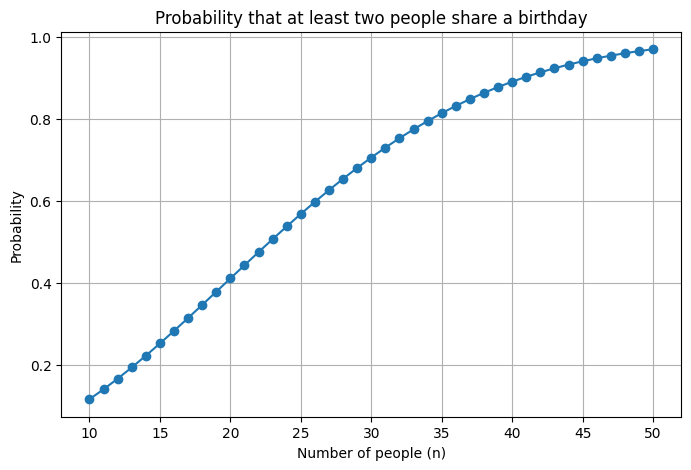

In [1]:
import math
import matplotlib.pyplot as plt

# Compute the probability
def birthday_prob(n):
    days = 365
    p_distinct = math.factorial(days) / (math.factorial(days - n) * (days ** n))
    return 1 - p_distinct

# For n = 10 to 50
n_values = range(10, 51)
p_values = [birthday_prob(n) for n in n_values]

# Plot
plt.figure(figsize=(8,5))
plt.plot(n_values, p_values, marker='o')
plt.title("Probability that at least two people share a birthday")
plt.xlabel("Number of people (n)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

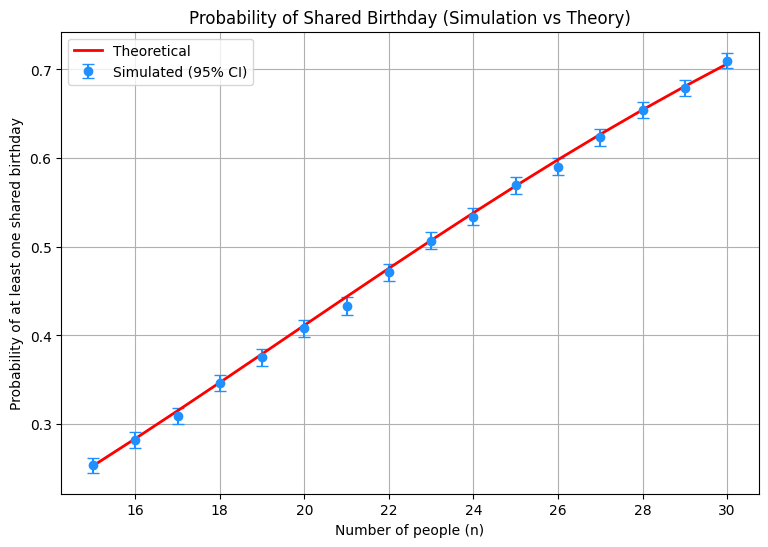

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

# seed
np.random.seed(0)

# Parameters
num_sim = 10000
days = 365
n_values = range(15, 31)

# Theoretical probability function
def birthday_prob(n):
    p_distinct = math.prod([(days - i) / days for i in range(n)])
    return 1 - p_distinct

# Simulation
def simulate_birthday(n, num_sim=10000):
    count_shared = 0
    for _ in range(num_sim):
        birthdays = np.random.randint(1, days + 1, n)
        if len(np.unique(birthdays)) < n:
            count_shared += 1
    p_hat = count_shared / num_sim
    se = math.sqrt(p_hat * (1 - p_hat) / num_sim)
    ci = (p_hat - 1.96 * se, p_hat + 1.96 * se)
    return p_hat, ci

# Run the simulation for each n
sim_estimates = []
lower_ci = []
upper_ci = []
theoretical = []

for n in n_values:
    p_hat, ci = simulate_birthday(n, num_sim)
    sim_estimates.append(p_hat)
    lower_ci.append(ci[0])
    upper_ci.append(ci[1])
    theoretical.append(birthday_prob(n))

# Plot
plt.figure(figsize=(9,6))
plt.errorbar(n_values, sim_estimates,
             yerr=[np.array(sim_estimates) - np.array(lower_ci),
                   np.array(upper_ci) - np.array(sim_estimates)],
             fmt='o', label='Simulated (95% CI)', capsize=4, color='dodgerblue')
plt.plot(n_values, theoretical, 'r-', label='Theoretical', linewidth=2)

plt.title("Probability of Shared Birthday (Simulation vs Theory)")
plt.xlabel("Number of people (n)")
plt.ylabel("Probability of at least one shared birthday")
plt.legend()
plt.grid(True)
plt.show()

<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as stats

# Load data (space or tab-separated)
df = pd.read_csv("bdaydata.txt", sep='\s+', header=None, names=["day", "count"])
print(df.head())

# Normalize counts to proportions if needed
birth_counts = df["count"].iloc[1:].values
days = df["day"].iloc[1:].values

    day  count
0  date  count
1  0101   1482
2  0102   1213
3  0103   1220
4  0104   1319


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2371670548.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("bdaydata.txt", sep='\s+', header=None, names=["day", "count"])


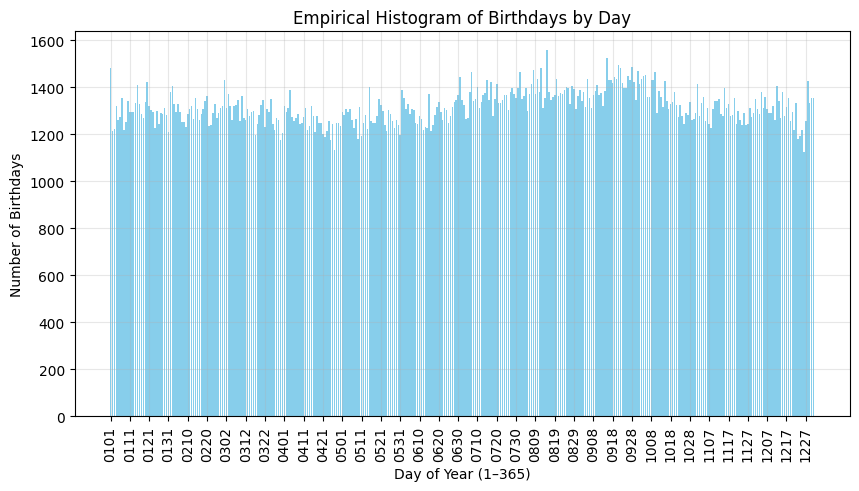

In [41]:
## Plot histogram

birth_counts = birth_counts.astype(int)

plt.figure(figsize=(10,5))
plt.bar(days, birth_counts, color='skyblue')
plt.title("Empirical Histogram of Birthdays by Day")
plt.xlabel("Day of Year (1–365)")
plt.ylabel("Number of Birthdays")

# X-ticks every 10 days
plt.xticks(np.arange(0, 366, 10), rotation = 90)

plt.grid(True, alpha=0.3)
plt.show()

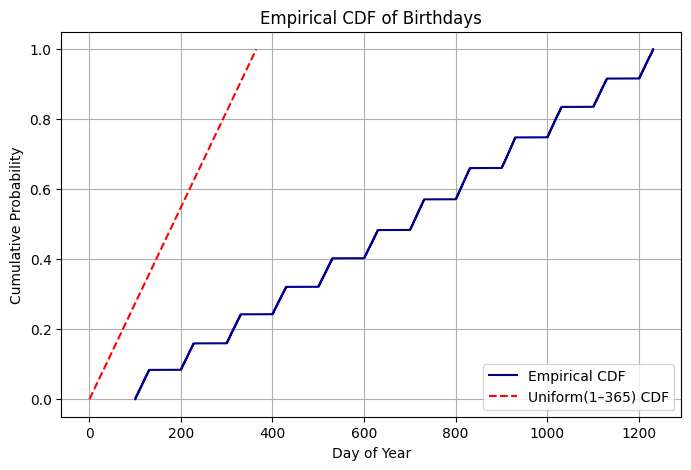

In [44]:
# Plot the empirical cdf

days = days.astype(int)
birth_counts = birth_counts.astype(int)

# Compute ECDF
ecdf = ECDF(np.repeat(days, birth_counts))  # replicate each day by its count

plt.figure(figsize=(8,5))
plt.plot(ecdf.x, ecdf.y, color='darkblue', label='Empirical CDF')
plt.plot([1, 365], [0, 1], 'r--', label='Uniform(1–365) CDF')
plt.title("Empirical CDF of Birthdays")
plt.xlabel("Day of Year")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()

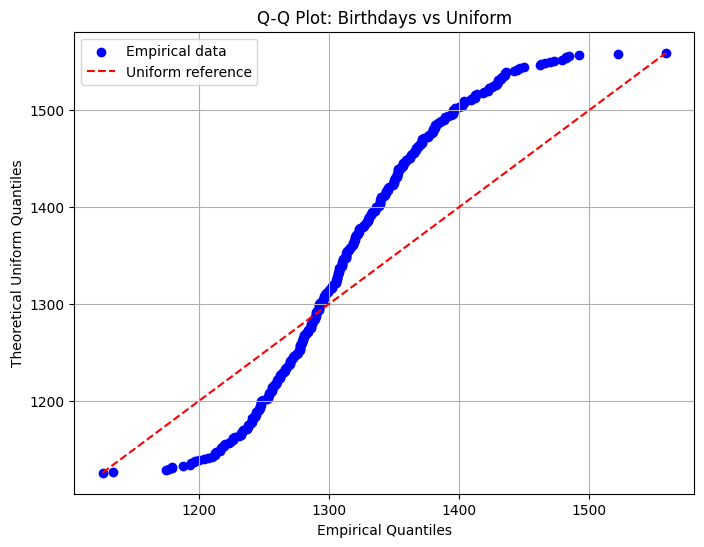

In [49]:
# Assume birth_counts is your data (length 365), converted to int
data = birth_counts.astype(int)

# Sort the data and compute the uniform quantiles
sorted_data = np.sort(data)
uniform_quantiles = np.linspace(np.min(data), np.max(data), len(data))

# Q-Q plot
plt.figure(figsize=(8,6))

# Plot the empirical quantiles
plt.scatter(sorted_data, uniform_quantiles, color='blue', label='Empirical data')

# Plot reference line y=x for uniform
plt.plot([np.min(data), np.max(data)], [np.min(data), np.max(data)],
         color='red', linestyle='--', label='Uniform reference')

plt.xlabel('Empirical Quantiles')
plt.ylabel('Theoretical Uniform Quantiles')
plt.title('Q-Q Plot: Birthdays vs Uniform')
plt.legend()
plt.grid(True)
plt.show()

## Ans.

<hr>

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


In [50]:
## Chi-square test

import numpy as np
from scipy.stats import chisquare

# Assume birth_counts is your data, length 365
birth_counts_int = birth_counts.astype(int)  # ensure integers

# Expected counts under uniform: total counts / 365
expected_counts = np.ones_like(birth_counts_int) * np.mean(birth_counts_int)

# Perform Chi-square test
chi2_stat, chi2_p = chisquare(f_obs=birth_counts_int, f_exp=expected_counts)

print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {chi2_p:.4f}")

Chi-square statistic: 1352.72
P-value: 0.0000


Interpreting the above results:
- Null hypothesis: counts are uniform across days.
- Small p-value (<0.05) → reject the null hypothesis; the data is not modeled by a uniform distribution.

In [52]:
## K-S test
from scipy.stats import kstest

# Normalize data to 0-1 range for uniform comparison
data_normalized = (birth_counts_int - np.min(birth_counts_int)) / (np.max(birth_counts_int) - np.min(birth_counts_int))

# K-S test against Uniform(0,1)
ks_stat, ks_p = kstest(data_normalized, 'uniform')

print(f"K-S statistic: {ks_stat:.4f}")
print(f"P-value: {ks_p:.4f}")

K-S statistic: 0.2429
P-value: 0.0000


Interpreting the above results:
- Null hypothesis: data comes from a uniform distribution.
- Small p-value → reject the null hypothesis; the data is not modeled by a uniform distribution.

<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

## Ans.


In [53]:
# Normalize counts to probabilities
birth_probs = birth_counts / birth_counts.sum()  # probabilities per day
days = np.arange(1, 366)

In [54]:
def shared_birthday_prob(n, days, probs, B=10000):
    """
    Estimate probability of at least 2 people sharing a birthday in a group of size n
    using nonparametric bootstrap.

    n: group size
    days: array of days (1..365)
    probs: probability for each day
    B: number of bootstrap samples
    """
    counts = np.zeros(B)

    for b in range(B):
        sample = np.random.choice(days, size=n, replace=True, p=probs)
        counts[b] = len(sample) != len(np.unique(sample))  # 1 if any duplicate, else 0

    prob_est = counts.mean()
    ci_lower = np.percentile(counts, 2.5)
    ci_upper = np.percentile(counts, 97.5)

    return prob_est, ci_lower, ci_upper

In [56]:
# Compute estimates for n = 15, 16, ..., 30

n_values = np.arange(15, 31)
prob_estimates = []
ci_lowers = []
ci_uppers = []

for n in n_values:
    prob, lower, upper = shared_birthday_prob(n, days, birth_probs, B=10000)
    prob_estimates.append(prob)
    ci_lowers.append(lower)
    ci_uppers.append(upper)

prob_estimates = np.array(prob_estimates)
ci_lowers = np.array(ci_lowers)
ci_uppers = np.array(ci_uppers)

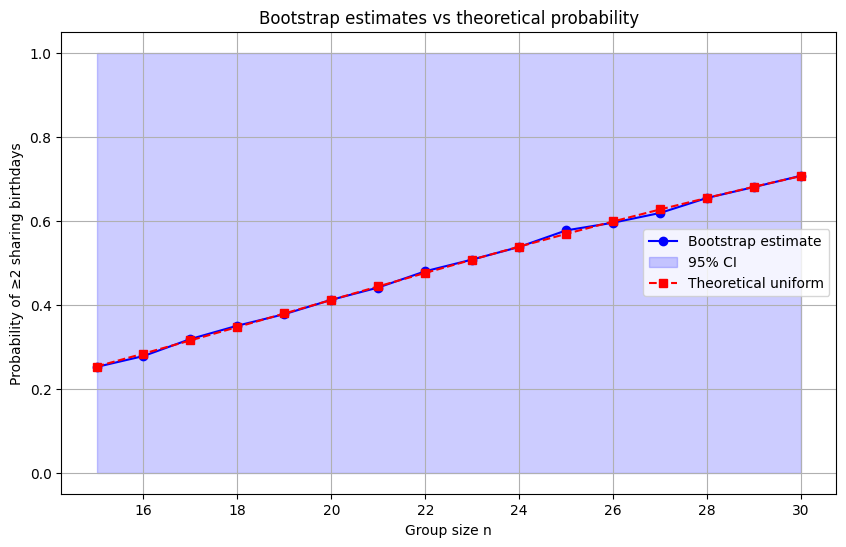

In [58]:
# Plot bootstrap estimates with 95% CI

plt.figure(figsize=(10,6))

# Bootstrap estimates
plt.plot(n_values, prob_estimates, 'o-', color='blue', label='Bootstrap estimate')
plt.fill_between(n_values, ci_lowers, ci_uppers, color='blue', alpha=0.2, label='95% CI')

# Theoretical probabilities using 'theoretical' from part b
plt.plot(n_values, theoretical, 's--', color='red', label='Theoretical uniform')

plt.xlabel('Group size n')
plt.ylabel('Probability of ≥2 sharing birthdays')
plt.title('Bootstrap estimates vs theoretical probability')
plt.legend()
plt.grid(True)
plt.show()

<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.

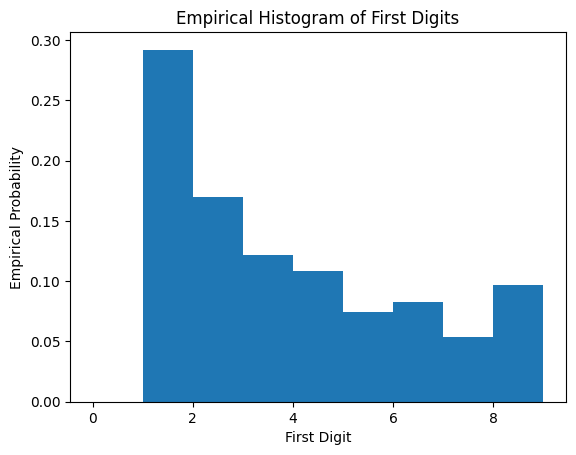

In [60]:
from scipy.special import factorial

n = 1500

fact_series = factorial(np.arange(n),exact=True)
first_digit = np.zeros(n)

for i in range(n):
  first_digit[i] = int(str(fact_series[i])[0])

# plot the empirical histogram
plt.hist(first_digit, bins=np.arange(10), density=True)
plt.xlabel('First Digit')
plt.ylabel('Empirical Probability')
plt.title('Empirical Histogram of First Digits')
plt.show()

<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

## Ans.

In [61]:
# Compute observed counts
import numpy as np
from scipy.stats import chisquare

# Count occurrences of each first digit (1 through 9)
observed_counts = np.array([np.sum(first_digit == d) for d in range(1, 10)])

# Compute expected counts under uniform distribution
total_samples = len(first_digit)
expected_counts = np.ones(9) * total_samples / 9

# Perform Chi-square test
chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4e}")

Chi-square statistic: 670.80
P-value: 1.3806e-139


Interpreting the above results:

- The null hypothesis $H_0$: the first digits of $n!$ are uniformly distributed.
- The alternative hypothesis $H_1$: the first digits of $n!$ are not uniformly distributed.

Small p-value ($1.3806 ⋅ 10^{-139} < 0.05$) → reject the null hypothesis. Hence, the uniform model is not a good fit; the data cannot be modeled well using a uniform distribution.

<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d) = \log _{10}(1+\frac{1}{d}), \quad d\in\{1,2,\ldots,9\}$$


<hr>

In [62]:
import numpy as np
from scipy.stats import chisquare

# Benford probabilities for digits 1..9
benford_probs = np.array([np.log10(1 + 1/d) for d in range(1, 10)])

# Compute observed counts
observed_counts = np.array([np.sum(first_digit == d) for d in range(1, 10)])

# Compute expected counts under Benford’s Law
total_samples = len(first_digit)
expected_counts = total_samples * benford_probs

# Perform Chi-square test
chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4e}")

Chi-square statistic: 9.46
P-value: 3.0525e-01


Interpreting the above results:
- Null hypothesis $H_0$: the first digits follow Benford's Law.
- Alternative hypothesis $H_1$: the first digits do not follow Benford's Law.

Since the p-value is large ($0.30525 > 0.05$), we do not reject $H_0$. Hence, the first digits follow Benford's Law, so the 'Benford's Law' distribution is a good fit. This is as expected since the first digits of factorials are known to follow Benford's Law closely.

<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

In [63]:
us_pop = pd.read_csv("us_pop.csv")
us_pop.head()

,population,zipcode
0,12,15711
1,111,29437
2,74,26519
3,121,85131
4,19,24318


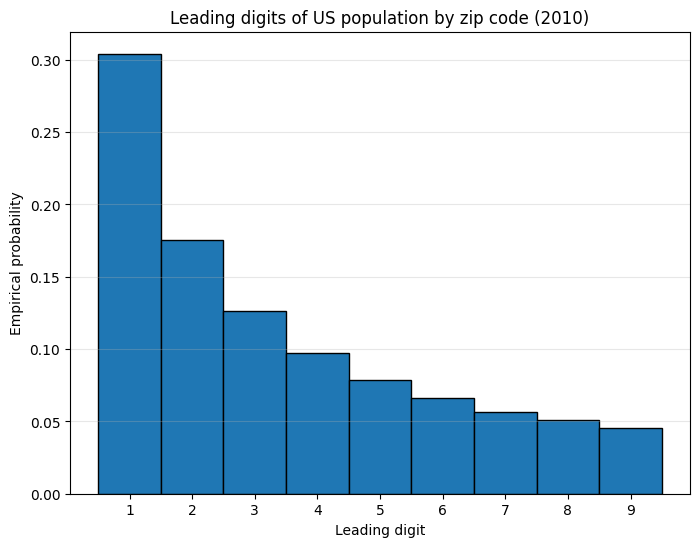

In [66]:
# Assume the column containing populations is named 'population'
populations = us_pop['population'].values

# Convert all numbers to strings and extract the first digit
first_digit = np.array([int(str(int(x))[0]) for x in populations])


# histogram
plt.figure(figsize=(8,6))
plt.hist(first_digit, bins=np.arange(1, 11)-0.5, edgecolor='black', density=True)
plt.xticks(range(1,10))
plt.xlabel("Leading digit")
plt.ylabel("Empirical probability")
plt.title("Leading digits of US population by zip code (2010)")
plt.grid(axis='y', alpha=0.3)
plt.show()

In [67]:
# Chi-square test against uniform distribution
from scipy.stats import chisquare

# Observed counts
observed_counts = np.array([np.sum(first_digit == d) for d in range(1, 10)])

# Expected counts under uniformity
total_samples = len(first_digit)
expected_uniform = np.ones(9) * total_samples / 9

# Chi-square test
chi2_stat_uniform, p_uniform = chisquare(f_obs=observed_counts, f_exp=expected_uniform)

print("Uniform distribution test:")
print(f"Chi-square statistic: {chi2_stat_uniform:.2f}")
print(f"P-value: {p_uniform:.4e}")

Uniform distribution test:
Chi-square statistic: 50323.54
P-value: 0.0000e+00


Interpreting the above results:

Since the p-value is small ($0.00 ≤ 0.05$), we reject $H_0$. Hence, the leading digits from the population data does not follow a uniform distribution reasonably well.

In [68]:
# Chi-square test against Benford's Law

# Benford probabilities
benford_probs = np.array([np.log10(1 + 1/d) for d in range(1, 10)])
expected_benford = benford_probs * total_samples

chi2_stat_benford, p_benford = chisquare(f_obs=observed_counts, f_exp=expected_benford)

print("Benford's Law test:")
print(f"Chi-square statistic: {chi2_stat_benford:.2f}")
print(f"P-value: {p_benford:.4e}")

Benford's Law test:
Chi-square statistic: 11.84
P-value: 1.5834e-01


Interpreting the above results:

Since the p-value is large ($0.15834 > 0.005$), we do not reject $H_0$. Hence, the leading digits from the population data does follow the Benford's Law distribution reasonably well.

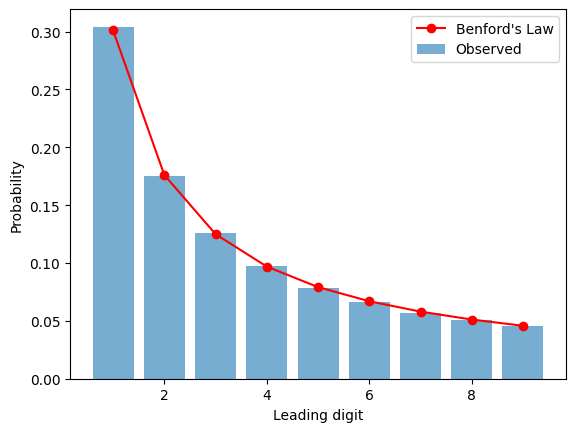

In [70]:
# Overlay the expected Benford probabilities on the histogram for comparison
plt.bar(range(1,10), observed_counts/total_samples, alpha=0.6, label="Observed")
plt.plot(range(1,10), benford_probs, 'ro-', label="Benford's Law")
plt.xlabel("Leading digit")
plt.ylabel("Probability")
plt.legend()
plt.show()

**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.

**Step 1: Define the leading digit**

Let $X > 0$ be a positive random variable. Suppose we want the probability that $X$ has leading digit $d$, where $d∈{1,2,…,9}$.

Mathematically:

$\mathbb{P}(leading \, digit \, of \, X=d)=P(d \cdot 10^k ≤ X < (d+1)\cdot 10^k$ for some integer $k$

This means $X$ could be $d,d0,d00,…,$ i.e., any number starting with $d$.

**Step 2: Transform using logarithms**

Take base-10 logarithm:

$$log_{10}(X) ∈ [log_{10}(d) + k, log_{10}(d+1) + k]$$

where $k ∈ \mathbb{Z}$ is any integer.

If $log_{10}(X)$ is uniformly distributed, then the probability only depends on the length of the interval, not the specific $k$.

**Step 3: Sum over all powers of 10**

Since the intervals $[log_{10}(d) + k, log_{10}(d+1) + k]$ repeat for all $k$, the total probability is just the interval width:

$$\mathbb{P}(leading \, digit = d) = log_{10}(d + 1) - log_{10}(d)$$

This is exactly Benford's Law.

In [71]:
# Step 4: Compute the exact probabilities for each of the leading digits
print("P(D = 1) =", np.log10(2) - np.log10(1))
print("P(D = 2) =", np.log10(3) - np.log10(2))
print("P(D = 3) =", np.log10(4) - np.log10(3))
print("P(D = 4) =", np.log10(5) - np.log10(4))
print("P(D = 5) =", np.log10(6) - np.log10(5))
print("P(D = 6) =", np.log10(7) - np.log10(6))
print("P(D = 7) =", np.log10(8) - np.log10(7))
print("P(D = 8) =", np.log10(9) - np.log10(8))
print("P(D = 9) =", np.log10(10) - np.log10(9))

P(D = 1) = 0.3010299956639812
P(D = 2) = 0.17609125905568124
P(D = 3) = 0.12493873660829996
P(D = 4) = 0.09691001300805646
P(D = 5) = 0.07918124604762478
P(D = 6) = 0.06694678963061318
P(D = 7) = 0.057991946977686726
P(D = 8) = 0.05115252244738133
P(D = 9) = 0.04575749056067513
